In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ot

import matplotlib
matplotlib.rc('xtick',labelsize = 20)
matplotlib.rc('ytick',labelsize = 20)
########################
def geometricBar(weights, alldistribT):
    """return the weighted geometric mean of distributions"""
    assert (len(weights) == alldistribT.shape[1])
    return np.exp(np.dot(np.log(alldistribT), weights.T))


def geometricMean(alldistribT):
    """return the  geometric mean of distributions"""
    return np.exp(np.mean(np.log(alldistribT), axis=1))

### Sinkhorn type algo for OT Barycenter
def barycenter_sinkhorn(marginals, cost, epsilon, weights = None, maxiter=1000, stopThr=1e-4):

    K = np.exp(-cost/epsilon)
    cpt = 0
    err = 1
    vT = np.divide(marginals.T, np.sum(K, axis=0))
    UKv = np.dot(K, vT.T)
    u = (geometricMean(UKv) / UKv.T).T

    ###
    # u = np.ones((100,2))
    ###
    while (cpt < maxiter):# err > stopThr and
        cpt = cpt + 1
        Ku = np.dot(K, u)
        v = np.divide(marginals, Ku)
        Kv = np.dot(K,v)
        UKv = u*Kv
        # UKv = u * np.dot(K, np.divide(marginals, np.dot(K, u)))
        u = (u.T * geometricBar(weights, UKv)).T / UKv

    return geometricBar(weights, UKv)

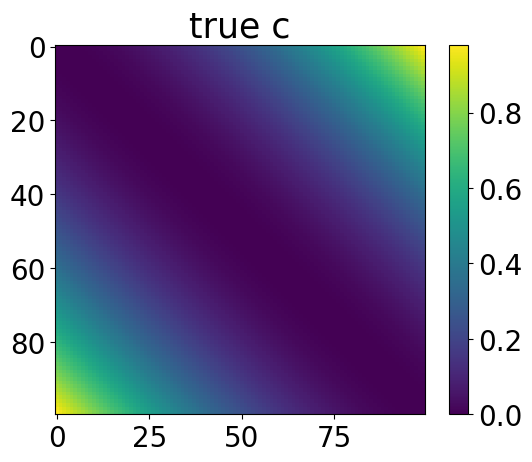

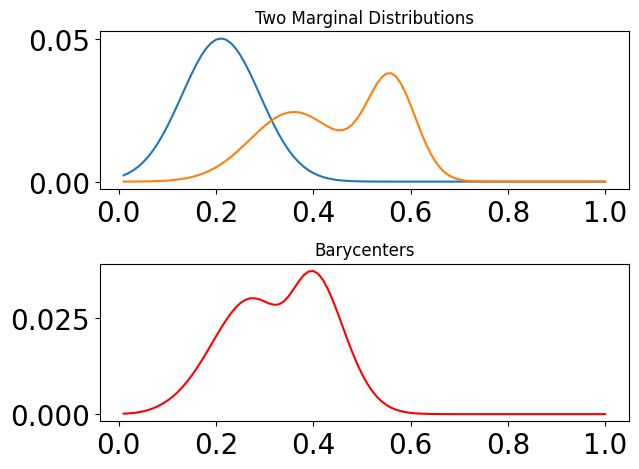

Done


In [2]:
n = 100
p = 2
x = np.linspace(1/n, 1, num=n)
cost = np.absolute(x - np.expand_dims(x, axis=1))
cost = np.power(cost, p)

# x = np.arange(n, dtype=np.float64)
# cost = ot.utils.dist0(n)
# cost /= cost.max()

p1 = ot.datasets.get_1D_gauss(n,20,8)#0.55 * ot.datasets.get_1D_gauss(n,20,8) + 0.45 * ot.datasets.get_1D_gauss(n,70,9)
p2 = 0.55 * ot.datasets.get_1D_gauss(n,35,9) + 0.45 * ot.datasets.get_1D_gauss(n,55,5)

# p1 = ot.datasets.get_1D_gauss(n, 35, 10)  # + 0.45 * ot.datasets.get_1D_gauss(n,80,9)
# p2 = ot.datasets.get_1D_gauss(n, 5, 10)
# creating matrix A containing all distributions
marginals = np.vstack((p1, p2)).T
n_distributions = marginals.shape[1]

alpha = 0.5  # 0<=alpha<=1
weights = np.array([1 - alpha, alpha])

plt.imshow(cost)
plt.colorbar()
# plt.clim(0, 1)
plt.title('true c', fontsize=25)
plt.show()

barycenter1 = barycenter_sinkhorn(marginals, cost, epsilon=0.001, weights=weights, maxiter=1000, stopThr=1e-4)

plt.figure(1)
plt.clf()
plt.subplot(2, 1, 1)
for i in range(n_distributions):
    plt.plot(x, marginals[:, i])
plt.title('Two Marginal Distributions')

plt.subplot(2, 1, 2)
plt.plot(x, barycenter1, 'r', label='Sinkhorn')
# plt.plot(x, bary_wass1, 'g', label='Sinkhorn')
# plt.plot(x, bary_wass2, 'b', label='Proximal')
# plt.legend(loc=1, bbox_to_anchor=(1.45, 1.1))
plt.title('Barycenters')
plt.tight_layout()
plt.show()

print('Done')